<a href="https://colab.research.google.com/github/suryaR-15/twitter-sentiment-analysis/blob/main/Tweet_Sentiment_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install datasets
! pip install wordcloud

In [ ]:
from datasets import Dataset, load_dataset

# EDA libraries import
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
from nltk.corpus import stopwords

import nltk
import string
from collections import Counter
nltk.download('stopwords')

In [4]:
# Import training data
data = load_dataset('csv', data_files='train.csv', split='train')
data

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['textID', 'text', 'selected_text', 'sentiment'],
    num_rows: 27481
})

In [5]:
# convert dataset object to pandas dataframe for EDA
df = pd.DataFrame(data)
df = df.dropna()
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [6]:
df.shape

(27480, 4)

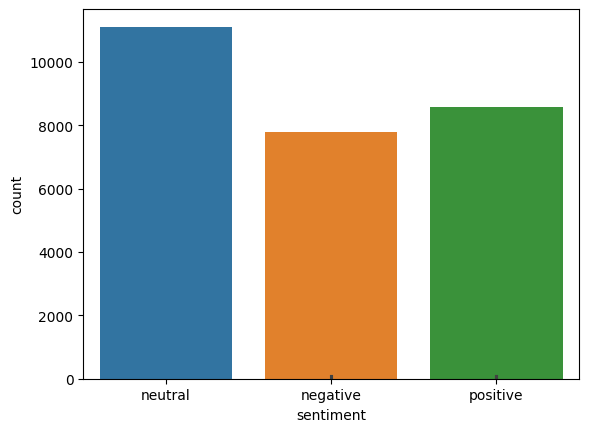

In [7]:
sns.countplot(data=df, x='sentiment', hue='sentiment')

df['text_len'] = [len(str(item)) for item in df['text']]
sns.barplot(data=df, x='sentiment', y='text_len', hue='sentiment')

tokenizer = TweetTokenizer()
df['tokenized_text'] = [tokenizer.tokenize(item) for item in df['selected_text']]

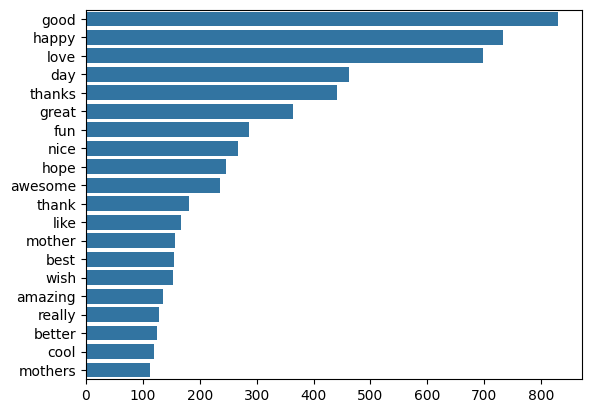

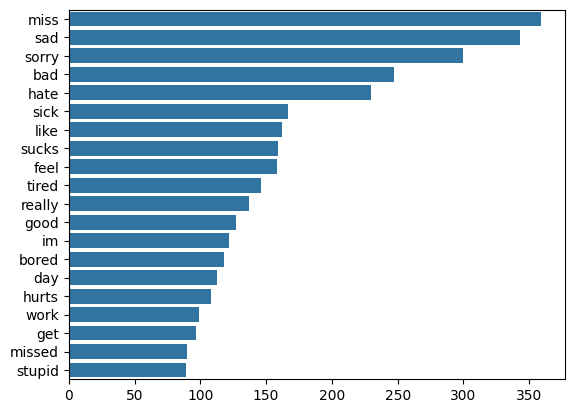

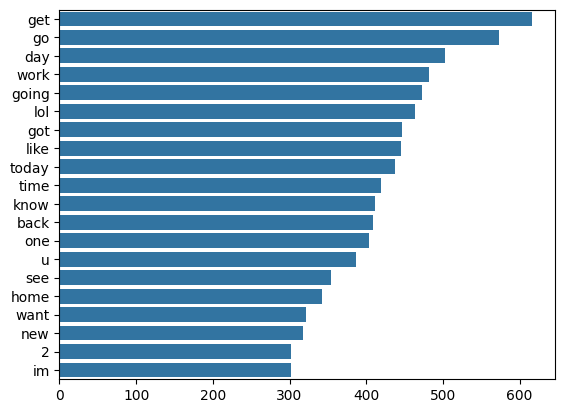

In [8]:
# plot the most commonly used words for each sentiment

exclude = stopwords.words('english')  # remove common words that conveys no meaning e.g. has, have
exclude.extend(list(string.punctuation)) # remove punctuations
exclude.extend(['..', '...'])  # training data specific stop words

df_pos = df[df['sentiment'] == 'positive']
df_neg = df[df['sentiment'] == 'negative']
df_neu = df[df['sentiment'] == 'neutral']

# flatten the tokenized_text column of the dataframe so that the result list
# contains all words from all the rows in the column
def get_single_list(df):
  new_list = [[word.lower() for word in mywords if word.lower() not in exclude] \
               for mywords in df['tokenized_text']]
  flat_list = [x for xs in new_list for x in xs]
  return flat_list

# get the words as a single list for each sentiment class
all_words_pos = get_single_list(df_pos)
all_words_neg = get_single_list(df_neg)
all_words_neu = get_single_list(df_neu)

# get the most common words from each class of sentiment
most_common_pos = Counter(all_words_pos).most_common(20)
most_common_neg = Counter(all_words_neg).most_common(20)
most_common_neu = Counter(all_words_neu).most_common(20)

# function to plot the most common words as a bar plot
def plot_most_common(most_common):
  words = []
  freq = []
  for word, count in most_common:
      words.append(word)
      freq.append(count)
  sns.barplot(x=freq, y=words)
  plt.show()

# call the plot function for the most common words for each sentiment
plot_most_common(most_common_pos)
plot_most_common(most_common_neg)
plot_most_common(most_common_neu)

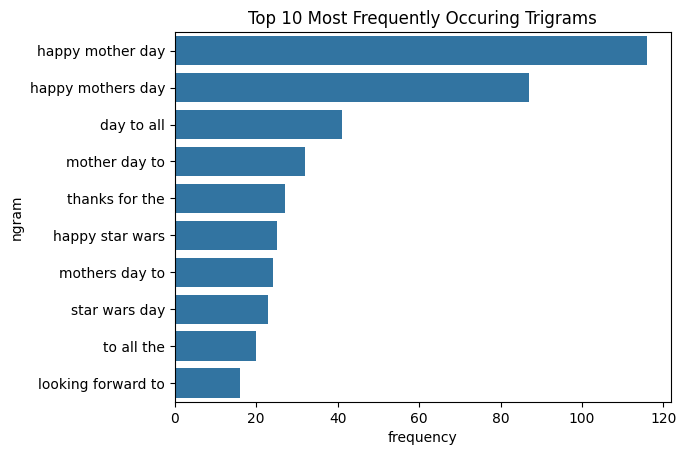

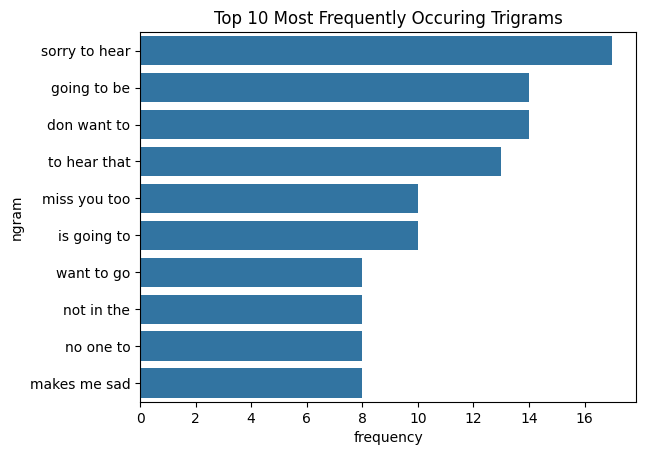

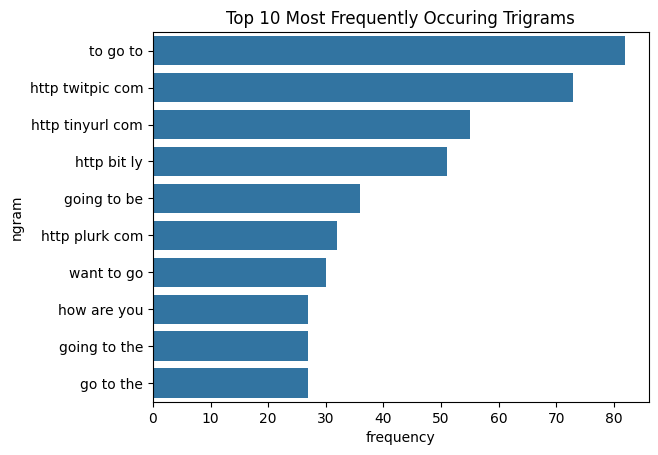

In [9]:
# Visualise frequency of tri-grams

from sklearn.feature_extraction.text import CountVectorizer

# plot function to visualise tri-grams
def plot_tri_grams(df):
  cv = CountVectorizer(ngram_range=(3, 3))
  bigrams = cv.fit_transform(df['selected_text'])
  count_values = bigrams.toarray().sum(axis=0)
  ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
  ngram_freq.columns = ["frequency", "ngram"]
  sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
  plt.title('Top 10 Most Frequently Occuring Trigrams')
  plt.show()

# call the plot function for data from each sentiment class
plot_tri_grams(df_pos)
plot_tri_grams(df_neg)
plot_tri_grams(df_neu)